In [1]:
# importing utilities
import os
import sys
from datetime import datetime
import io
import urllib

# importing data science libraries
import pandas as pd
import random as rd



import numpy as np

from sklearn.model_selection import train_test_split

# importing pytorch libraries
import torch
from torch import nn
from torch import autograd
from torch.utils.data import DataLoader, TensorDataset

# import visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# from IPython.display import Image, display
sns.set_style('darkgrid')

# ignore potential warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.utils import shuffle

In [2]:
%matplotlib inline

---

### CUDNN和GPU驗證(確認GPU可不可用)

In [3]:
# print CUDNN backend version 
now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
print('[LOG {}] The CUDNN backend version: {}'.format(now, torch.backends.cudnn.version()))

[LOG 20210601-15:41:09] The CUDNN backend version: None


In [4]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


### 如果CUDNN和GPU都可用，指定是否要同時使用兩者：

In [5]:
USE_CUDA = False

---

### 讀資料

In [6]:
dataset = pd.read_csv("./AE_train.csv")

dataset.columns

Index(['Current_Ratio', 'oper_cashflow_liab', 'current_liab_current_assets',
       'working_capital_assets', 'Net_Sales_Assets',
       'Receivables_Turnover_Ratio', 'Inventory_Turnover',
       'Fixed_Assets_Turnover', 'net_worth_turnover_ratio', 'INV_AR_Equity',
       ...
       'i71_nan', 'fin_depen_related_parties_nan', 'ratio_invest_equity_nan',
       'ratio_invest_assets_nan', 'ratio_endorsement_equity_nan',
       'adj_laib_equity_nan', 'ratio_director_shareholder_holding_nan',
       'ratio_majority shareholder_nan',
       'ratio_director_shareholder_Pledge_nan', 'negative_two_years_nan'],
      dtype='object', length=107)

In [7]:
#只抓前二十個重要特徵
dataset = pd.concat([dataset.Retained_earnings_assets,
dataset.negative_two_years,
dataset.earning_before_tax_margin,
dataset.Income_Before_Tax_and_Interests_assets,
dataset.Operating_margin,
dataset.Debt_Equity_Ratio,
dataset.Net_Asset_Value_per_Share_F,
dataset.ration_of_interest_expense,
dataset.l4,
dataset.i69,
dataset.net_income_change_rate,
dataset.l3,
dataset.l17,
dataset.Interest_Coverage_Ratio,
dataset.current_liab_current_assets,
dataset.debt_ratio,
dataset.Equity_Asset_Ratio,
dataset.Return_on_Operating_Assets,
dataset.i71,
dataset.fin_depen_related_parties,
dataset.Retained_earnings_assets_nan,
dataset.negative_two_years_nan,
dataset.earning_before_tax_margin_nan,
dataset.Income_Before_Tax_and_Interests_assets_nan,
dataset.Operating_margin_nan,
dataset.Debt_Equity_Ratio_nan,
dataset.Net_Asset_Value_per_Share_F_nan,
dataset.ration_of_interest_expense_nan,
dataset.l4_nan,
dataset.i69_nan,
dataset.net_income_change_rate_nan,
dataset.l3_nan,
dataset.l17_nan,
dataset.Interest_Coverage_Ratio_nan,
dataset.current_liab_current_assets_nan,
dataset.debt_ratio_nan,
dataset.Equity_Asset_Ratio_nan,
dataset.Return_on_Operating_Assets_nan,
dataset.i71_nan,
dataset.fin_depen_related_parties_nan,
dataset.crisis],axis =1)

In [8]:
dataset.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
0,0.03,0,0.81,0.02,3.06,193.85,21.30,114.12,0.07,12.18,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.04,0,-0.28,0.02,9.42,177.04,23.24,72.75,-0.14,11.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.05,0,7.09,0.04,17.67,159.64,22.99,63.70,1.23,10.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.07,0,15.48,0.07,18.04,142.68,23.42,26.97,2.94,11.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.06,0,19.08,0.04,19.13,146.26,22.83,18.31,2.05,8.18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [9]:
crisis = dataset.pop('crisis')
crisis

0         0
1         0
2         0
3         0
4         0
         ..
111442    0
111443    0
111444    0
111445    0
111446    0
Name: crisis, Length: 111447, dtype: int64

In [10]:
dataset.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,net_income_change_rate_nan,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan
0,0.03,0,0.81,0.02,3.06,193.85,21.30,114.12,0.07,12.18,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.04,0,-0.28,0.02,9.42,177.04,23.24,72.75,-0.14,11.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.05,0,7.09,0.04,17.67,159.64,22.99,63.70,1.23,10.93,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.07,0,15.48,0.07,18.04,142.68,23.42,26.97,2.94,11.79,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.06,0,19.08,0.04,19.13,146.26,22.83,18.31,2.05,8.18,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


dataset.Retained_earnings_assets,
dataset.negative_two_years,
dataset.earning_before_tax_margin,
dataset.Income_Before_Tax_and_Interests_assets,
dataset.Operating_margin,
dataset.Debt_Equity_Ratio,
dataset.Net_Asset_Value_per_Share_F,
dataset.ration_of_interest_expense,
dataset.l4,
dataset.i69,
dataset.net_income_change_rate,
dataset.l3,
dataset.l17,
dataset.Interest_Coverage_Ratio,
dataset.current_liab_current_assets,
dataset.debt_ratio,
dataset.Equity_Asset_Ratio,
dataset.Return_on_Operating_Assets,
dataset.i71,
dataset.fin_depen_related_parties,
dataset.Retained_earnings_assets_nan,
dataset.negative_two_years_nan,
dataset.earning_before_tax_margin_nan,
dataset.Income_Before_Tax_and_Interests_assets_nan,
dataset.Operating_margin_nan,
dataset.Debt_Equity_Ratio_nan,
dataset.Net_Asset_Value_per_Share_F_nan,
dataset.ration_of_interest_expense_nan,
dataset.l4_nan,
dataset.i69_nan,
dataset.net_income_change_rate_nan,
dataset.l3_nan,
dataset.l17_nan,
dataset.Interest_Coverage_Ratio_nan,
dataset.current_liab_current_assets_nan,
dataset.debt_ratio_nan,
dataset.Equity_Asset_Ratio_nan,
dataset.Return_on_Operating_Assets_nan,
dataset.i71_nan,
dataset.fin_depen_related_parties_nan,
dataset.crisis

In [11]:
from sklearn.model_selection import train_test_split

#切80％為訓練集 
X_train, X_test, y_train, y_test = train_test_split(dataset,crisis, test_size=0.2, shuffle=True)

#將訓練集在切20％當val_data
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle=True)

X_train

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,net_income_change_rate_nan,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan
61336,0.14,0,23.77,0.08,24.60,46.38,17.65,0.75,2.12,1.17,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73463,0.09,0,14.41,0.06,14.92,451.14,34.65,5.82,11.24,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.30,0,13.00,0.03,6.73,7.32,14.87,0.00,0.42,0.03,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
92225,0.14,0,5.06,0.21,5.31,123.07,26.65,7.70,11.51,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73146,0.06,0,121.55,0.02,0.00,278.12,18.14,0.00,0.84,0.00,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62878,0.00,0,0.07,0.01,-0.22,156.09,17.20,70.19,0.05,0.66,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48892,0.10,0,4.91,0.01,1.52,78.55,17.53,9.88,0.22,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,-0.08,1,-13.79,-0.04,-10.73,656.70,6.53,-33.97,-2.69,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41411,0.18,0,7.44,0.03,2.02,109.73,26.13,8.15,1.38,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# train 全部 一起正規化
train_data = pd.concat([X_train,y_train],axis =1)

for col in train_data.columns:
    train_data[col] = (train_data[col] - train_data[col].min()) / (train_data[col].max() - train_data[col].min())
train_data = train_data.fillna(0)
train_data

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
61336,0.998834,0.0,0.746781,0.417371,0.998154,0.000111,0.004616,0.907171,0.000599,0.467561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73463,0.998781,0.0,0.746779,0.417270,0.998152,0.001083,0.004623,0.907174,0.000607,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.999003,0.0,0.746779,0.417118,0.998150,0.000018,0.004614,0.907170,0.000598,0.466674,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92225,0.998834,0.0,0.746778,0.418030,0.998150,0.000295,0.004620,0.907175,0.000608,0.466768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73146,0.998749,0.0,0.746795,0.417068,0.998149,0.000667,0.004616,0.907170,0.000598,0.466651,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62878,0.998685,0.0,0.746777,0.417017,0.998149,0.000375,0.004615,0.907216,0.000598,0.467165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48892,0.998791,0.0,0.746778,0.417017,0.998149,0.000188,0.004616,0.907177,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,0.998600,1.0,0.746775,0.416764,0.998147,0.001576,0.004611,0.907148,0.000595,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41411,0.998876,0.0,0.746778,0.417118,0.998149,0.000263,0.004619,0.907176,0.000599,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
train_goodcompany = train_data[train_data.crisis == 0]
train_badcompany = train_data[train_data.crisis == 1]

In [14]:
y_train_goodcompany = train_goodcompany.pop('crisis')
y_train_badcompany = train_badcompany.pop('crisis')

In [15]:
train_goodcompany.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,net_income_change_rate_nan,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan
61336,0.998834,0.0,0.746781,0.417371,0.998154,0.000111,0.004616,0.907171,0.000599,0.467561,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73463,0.998781,0.0,0.746779,0.417270,0.998152,0.001083,0.004623,0.907174,0.000607,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.999003,0.0,0.746779,0.417118,0.998150,0.000018,0.004614,0.907170,0.000598,0.466674,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
92225,0.998834,0.0,0.746778,0.418030,0.998150,0.000295,0.004620,0.907175,0.000608,0.466768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73146,0.998749,0.0,0.746795,0.417068,0.998149,0.000667,0.004616,0.907170,0.000598,0.466651,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [16]:
# traindata已經被正規化，再concat一個給test,val正規化
train = pd.concat([X_train,y_train],axis =1)
train.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
61336,0.14,0,23.77,0.08,24.60,46.38,17.65,0.75,2.12,1.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73463,0.09,0,14.41,0.06,14.92,451.14,34.65,5.82,11.24,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10080,0.30,0,13.00,0.03,6.73,7.32,14.87,0.00,0.42,0.03,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
92225,0.14,0,5.06,0.21,5.31,123.07,26.65,7.70,11.51,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73146,0.06,0,121.55,0.02,0.00,278.12,18.14,0.00,0.84,0.00,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0


In [17]:
# test 全部 一起正規化
test_data = pd.concat([X_test,y_test],axis =1)

for col in test_data.columns:
    test_data[col] = (test_data[col] - train[col].min()) / (train[col].max() - train[col].min())
test_data = test_data.fillna(0)
test_data

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
109953,0.998749,0.0,0.746777,0.417017,0.998149,0.000303,0.004614,0.907199,0.000598,0.466651,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
84422,0.998844,0.0,0.746778,0.417017,0.998150,0.000225,0.004618,0.907174,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95594,0.998781,0.0,0.746779,0.417422,0.998151,0.000177,0.004614,0.907173,0.000599,0.459765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30409,0.998812,0.0,0.746777,0.417118,0.998150,0.000118,0.004619,0.907175,0.000599,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17860,0.998865,0.0,0.746782,0.417675,0.998155,0.000048,0.004614,0.907170,0.000599,0.487838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77984,0.999014,0.0,0.746781,0.417625,0.998154,0.000068,0.004616,0.907171,0.000600,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2517,0.998982,0.0,0.746779,0.417068,0.998151,0.000178,0.004624,0.907175,0.000599,0.468674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36157,0.998516,0.0,0.746770,0.415700,0.998140,0.000686,0.004610,0.907167,0.000592,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5975,0.998759,0.0,0.746777,0.416966,0.998149,0.000311,0.004614,0.907200,0.000598,0.468184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# val 全部 一起正規化
val_data = pd.concat([X_val,y_val],axis =1)

for col in val_data.columns:
    val_data[col] = (val_data[col] - train[col].min()) / (train[col].max() - train[col].min())
val_data = val_data.fillna(0)
val_data

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
52623,0.998759,0.0,0.746776,0.416966,0.998148,0.000427,0.004619,0.907156,0.000597,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26439,0.998781,0.0,0.746746,0.416966,0.998119,0.000479,0.004621,0.907145,0.000597,0.502630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56999,0.998823,0.0,0.746779,0.417371,0.998152,0.000118,0.004614,0.907174,0.000599,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28819,0.998865,0.0,0.746780,0.417169,0.998154,0.000516,0.004628,0.907202,0.000600,0.467095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101197,0.998823,0.0,0.746777,0.417017,0.998149,0.000712,0.004609,0.907224,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725,0.998950,0.0,0.746777,0.416966,0.998150,0.000071,0.004618,0.907183,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50715,0.998685,0.0,0.746766,0.416966,0.998152,0.000044,0.004611,0.907170,0.000596,0.466651,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
71234,0.998706,0.0,0.746778,0.417068,0.998152,0.000345,0.004614,0.907189,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86328,0.998653,0.0,0.746768,0.416865,0.998137,0.000007,0.004620,0.907170,0.000597,0.468480,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
val_goodcompany = val_data[val_data.crisis == 0]
val_badcompany = val_data[val_data.crisis == 1]

In [20]:
y_val_goodcompany = val_goodcompany.pop('crisis')
y_val_badcompany = val_badcompany.pop('crisis')

---

## Encoder/Decoder 架設

### Encoder

In [21]:
# implementation of the encoder network
class encoder(nn.Module):

    def __init__(self):

        super(encoder, self).__init__()

        # specify layer 1 - in 106 , out 512
        self.encoder_L1 = nn.Linear(in_features=train_goodcompany.shape[1], out_features=512, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.encoder_L1.weight) # init weights according to [9]
        self.encoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 512, out 256
        self.encoder_L2 = nn.Linear(512, out_features=256, bias=True)
        nn.init.xavier_uniform_(self.encoder_L2.weight)
        self.encoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 256, out 128
        self.encoder_L3 = nn.Linear(256, out_features=128, bias=True)
        nn.init.xavier_uniform_(self.encoder_L3.weight)
        self.encoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 128, out 64
        self.encoder_L4 = nn.Linear(128, 64, bias=True)
        nn.init.xavier_uniform_(self.encoder_L4.weight)
        self.encoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 64, out 32
        self.encoder_L5 = nn.Linear(64, 32, bias=True)
        nn.init.xavier_uniform_(self.encoder_L5.weight)
        self.encoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 32, out 16
        self.encoder_L6 = nn.Linear(32, 16, bias=True)
        nn.init.xavier_uniform_(self.encoder_L6.weight)
        self.encoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 7 - in 16, out 8
        self.encoder_L7 = nn.Linear(16, 8, bias=True)
        nn.init.xavier_uniform_(self.encoder_L7.weight)
        self.encoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 8, out 4
        self.encoder_L8 = nn.Linear(8, 4, bias=True)
        nn.init.xavier_uniform_(self.encoder_L8.weight)
        self.encoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 4, out 3
        self.encoder_L9 = nn.Linear(4, 3, bias=True)
        nn.init.xavier_uniform_(self.encoder_L9.weight)
        self.encoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0, inplace=True)
        
    def forward(self, x):

        # define forward pass through the network
        x = self.encoder_R1(self.dropout(self.encoder_L1(x)))
        x = self.encoder_R2(self.dropout(self.encoder_L2(x)))
        x = self.encoder_R3(self.dropout(self.encoder_L3(x)))
        x = self.encoder_R4(self.dropout(self.encoder_L4(x)))
        x = self.encoder_R5(self.dropout(self.encoder_L5(x)))
        x = self.encoder_R6(self.dropout(self.encoder_L6(x)))
        x = self.encoder_R7(self.dropout(self.encoder_L7(x)))
        x = self.encoder_R8(self.dropout(self.encoder_L8(x)))
        x = self.encoder_R9(self.encoder_L9(x)) # don't apply dropout to the AE bottleneck

        return x

In [22]:
# init training network classes / architectures
encoder_train = encoder()

In [23]:
# CPU上訓練或在任何可用GPU（如果CUDNN可用並將USE_CUDA其設置為True）上訓練的編碼器模型
# push to cuda if cudnn is available

if (torch.backends.cudnn.version() != None and USE_CUDA == True):
    encoder_train = encoder().cuda()

In [24]:
# print the initialized architectures
print('encoder architecture:\n\n{}\n'.format(encoder_train))

encoder architecture:

encoder(
  (encoder_L1): Linear(in_features=40, out_features=512, bias=True)
  (encoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L3): Linear(in_features=256, out_features=128, bias=True)
  (encoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L5): Linear(in_features=64, out_features=32, bias=True)
  (encoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L6): Linear(in_features=32, out_features=16, bias=True)
  (encoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L7): Linear(in_features=16, out_features=8, bias=True)
  (encoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (encoder_L8): Linear(in_features=8, out_features=4, bias=True)
  (encode

---
### Decoder

In [25]:
# implementation of the decoder network
class decoder(nn.Module):

    def __init__(self):

        super(decoder, self).__init__()

        # specify layer 1 - in 3, out 4
        self.decoder_L1 = nn.Linear(in_features=3, out_features=4, bias=True) # add linearity 
        nn.init.xavier_uniform_(self.decoder_L1.weight)  # init weights according to [9]
        self.decoder_R1 = nn.LeakyReLU(negative_slope=0.4, inplace=True) # add non-linearity according to [10]

        # specify layer 2 - in 4, out 8
        self.decoder_L2 = nn.Linear(4, 8, bias=True)
        nn.init.xavier_uniform_(self.decoder_L2.weight)
        self.decoder_R2 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 3 - in 8, out 16
        self.decoder_L3 = nn.Linear(8, 16, bias=True)
        nn.init.xavier_uniform_(self.decoder_L3.weight)
        self.decoder_R3 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 4 - in 16, out 32
        self.decoder_L4 = nn.Linear(16, 32, bias=True)
        nn.init.xavier_uniform_(self.decoder_L4.weight)
        self.decoder_R4 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 5 - in 32, out 64
        self.decoder_L5 = nn.Linear(32, 64, bias=True)
        nn.init.xavier_uniform_(self.decoder_L5.weight)
        self.decoder_R5 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 6 - in 64, out 128
        self.decoder_L6 = nn.Linear(64, 128, bias=True)
        nn.init.xavier_uniform_(self.decoder_L6.weight)
        self.decoder_R6 = nn.LeakyReLU(negative_slope=0.4, inplace=True)
        
        # specify layer 7 - in 128, out 256
        self.decoder_L7 = nn.Linear(128, 256, bias=True)
        nn.init.xavier_uniform_(self.decoder_L7.weight)
        self.decoder_R7 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 8 - in 256, out 512
        self.decoder_L8 = nn.Linear(256, 512, bias=True)
        nn.init.xavier_uniform_(self.decoder_L8.weight)
        self.decoder_R8 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # specify layer 9 - in 512, out 106
        self.decoder_L9 = nn.Linear(in_features=512, out_features=train_goodcompany.shape[1], bias=True)
        nn.init.xavier_uniform_(self.decoder_L9.weight)
        self.decoder_R9 = nn.LeakyReLU(negative_slope=0.4, inplace=True)

        # init dropout layer with probability p
        self.dropout = nn.Dropout(p=0, inplace=True)

    def forward(self, x):

        # define forward pass through the network
        x = self.decoder_R1(self.dropout(self.decoder_L1(x)))
        x = self.decoder_R2(self.dropout(self.decoder_L2(x)))
        x = self.decoder_R3(self.dropout(self.decoder_L3(x)))
        x = self.decoder_R4(self.dropout(self.decoder_L4(x)))
        x = self.decoder_R5(self.dropout(self.decoder_L5(x)))
        x = self.decoder_R6(self.dropout(self.decoder_L6(x)))
        x = self.decoder_R7(self.dropout(self.decoder_L7(x)))
        x = self.decoder_R8(self.dropout(self.decoder_L8(x)))
        x = self.decoder_R9(self.decoder_L9(x)) # don't apply dropout to the AE output
        
        return x

In [26]:
# init training network classes / architectures
decoder_train = decoder()

In [27]:
# CPU上訓練或在任何可用GPU（如果CUDNN可用並將USE_CUDA其設置為True）上訓練的編碼器模型
# push to cuda if cudnn is available

if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    decoder_train = decoder().cuda()  

In [28]:
# print the initialized architectures
print('decoder architecture:\n\n{}\n'.format(decoder_train))

decoder architecture:

decoder(
  (decoder_L1): Linear(in_features=3, out_features=4, bias=True)
  (decoder_R1): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L2): Linear(in_features=4, out_features=8, bias=True)
  (decoder_R2): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L3): Linear(in_features=8, out_features=16, bias=True)
  (decoder_R3): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L4): Linear(in_features=16, out_features=32, bias=True)
  (decoder_R4): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L5): Linear(in_features=32, out_features=64, bias=True)
  (decoder_R5): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L6): Linear(in_features=64, out_features=128, bias=True)
  (decoder_R6): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L7): Linear(in_features=128, out_features=256, bias=True)
  (decoder_R7): LeakyReLU(negative_slope=0.4, inplace=True)
  (decoder_L8): Linear(in_features=256, out_features=512, bias=True)
  (decoder_R

---

## Encoder 訓練

In [29]:
# define the optimization criterion / loss function
loss_function = nn.BCEWithLogitsLoss(reduction='mean')

In [30]:
# define learning rate and optimization strategy
learning_rate = 0.001
encoder_optimizer = torch.optim.Adam(encoder_train.parameters(), lr=learning_rate)
decoder_optimizer = torch.optim.Adam(decoder_train.parameters(), lr=learning_rate)

In [31]:
#指定訓練參數
num_epochs = 50
batch_size = 128

In [32]:
type(train_goodcompany)

pandas.core.frame.DataFrame

In [33]:
train_goodcompany

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,net_income_change_rate_nan,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan
61336,0.998834,0.0,0.746781,0.417371,0.998154,0.000111,0.004616,0.907171,0.000599,0.467561,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73463,0.998781,0.0,0.746779,0.417270,0.998152,0.001083,0.004623,0.907174,0.000607,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.999003,0.0,0.746779,0.417118,0.998150,0.000018,0.004614,0.907170,0.000598,0.466674,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
92225,0.998834,0.0,0.746778,0.418030,0.998150,0.000295,0.004620,0.907175,0.000608,0.466768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73146,0.998749,0.0,0.746795,0.417068,0.998149,0.000667,0.004616,0.907170,0.000598,0.466651,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62878,0.998685,0.0,0.746777,0.417017,0.998149,0.000375,0.004615,0.907216,0.000598,0.467165,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48892,0.998791,0.0,0.746778,0.417017,0.998149,0.000188,0.004616,0.907177,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,0.998600,1.0,0.746775,0.416764,0.998147,0.001576,0.004611,0.907148,0.000595,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41411,0.998876,0.0,0.746778,0.417118,0.998149,0.000263,0.004619,0.907176,0.000599,0.466651,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# convert pre-processed data to pytorch tensor
torch_train_good = torch.from_numpy(train_goodcompany.values).float()

torch_val_good = torch.from_numpy(val_goodcompany.values).float()
# convert to pytorch tensor - none cuda enabled
dataloader = DataLoader(torch_train_good, batch_size=batch_size, shuffle=True, num_workers=0)
# note: we set num_workers to zero to retrieve deterministic results



In [35]:
# determine if CUDA is available at compute node
if (torch.backends.cudnn.version() != None) and (USE_CUDA == True):
    dataloader = DataLoader(torch_dataset.cuda(), batch_size=batch_size, shuffle=True)

###   Network Training
1. 通過編碼器-解碼器部分進行正向傳遞
2. 計算二進制交叉熵重建損失
3. 向後通過編碼器-解碼器部分，並且
4. 更新編碼器和解碼器網絡的參數。

* reconstruction_loss.backward() 根據重建損失的大小計算梯度
* encoder_optimizer.step()並decoder_optimizer.step()根據梯度更新網絡參數 

* encoder_train.cuda( )：將所有模型參數和緩衝區移至GPU
* encoder_train.cpu( )：將所有模型參數和緩衝區移至CPU。<hr>
* torch.save( )：將實際編碼器和解碼器型號參數值的檢查點保存

In [36]:
# init collection of epoch losses
epoch_losses = []
epoch_losses_val  =[] 

# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_train_good)

# train autoencoder model
for epoch in range(num_epochs):

    # init collection of epoch losses
    mini_batch_losses = []
    
    # init mini batch counter
    mini_batch_count = 0
    
    # determine if CUDA is available at compute node
    if(torch.backends.cudnn.version() != None) and (USE_CUDA == True):
        
        # set networks / models in GPU mode
        encoder_train.cuda()
        decoder_train.cuda()

    # set networks in training mode (apply dropout when needed)
    encoder_train.train()
    decoder_train.train()

    # start timer
    start_time = datetime.now()
        
    # iterate over all mini-batches
    for mini_batch_data in dataloader:

        # increase mini batch counter
        mini_batch_count += 1

        # convert mini batch to torch variable
        mini_batch_torch = autograd.Variable(mini_batch_data)

        # =================== (1) forward pass ===================================

        # run forward pass
        z_representation = encoder_train(mini_batch_torch) # encode mini-batch data
        mini_batch_reconstruction = decoder_train(z_representation) # decode mini-batch data
        
        # =================== (2) compute reconstruction loss ====================

        # determine reconstruction loss
        reconstruction_loss = loss_function(mini_batch_reconstruction, mini_batch_torch)
        
        # =================== (3) backward pass ==================================

        # reset graph gradients
        decoder_optimizer.zero_grad()
        encoder_optimizer.zero_grad()

        # run backward pass
        reconstruction_loss.backward()
        
        # =================== (4) update model parameters ========================

        # update network parameters
        decoder_optimizer.step()
        encoder_optimizer.step()

        # =================== monitor training progress ==========================

        # print training progress each 1'000 mini-batches
        if mini_batch_count % 1000 == 0:
            
            # print the training mode: either on GPU or CPU
            mode = 'GPU' if (torch.backends.cudnn.version() != None) and (USE_CUDA == True) else 'CPU'
            
            # print mini batch reconstuction results
            now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
            end_time = datetime.now() - start_time
            
          
    
            #     =================== evaluate model performance =============================
            
            print('[LOG {}] training status, epoch: [{:04}/{:04}], batch: {:04}, loss: {}, mode: {}, time required: {}'.format(now, (epoch+1), num_epochs, mini_batch_count, np.round(reconstruction_loss.item(), 4), mode, end_time))

            # reset timer
            start_time = datetime.now()
            
        # collect mini-batch loss
        mini_batch_losses.extend([np.round(reconstruction_loss.item(), 4)])
   
      #==================== evaluation==============================================
    # set networks in evaluation mode (don't apply dropout)
    encoder_train.eval()
    decoder_train.eval()
    # reconstruct encoded transactional data
    eval_reconstruction = decoder_train(encoder_train(torch_val_good))
    eval_reconstruction_loss = loss_function(eval_reconstruction, torch_val_good)
    epoch_losses_val.append(eval_reconstruction_loss.item())
    # collect mean training epoch loss
    epoch_losses.extend([np.mean(mini_batch_losses)])
    
    # print training epoch results
    now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
    print('[LOG {}] training status, epoch: [{:04}/{:04}], loss: {:.10f} ,loss_val: {}'.format(now, (epoch+1), num_epochs, np.mean(mini_batch_losses),np.round(eval_reconstruction_loss.item(), 4)))
    

[LOG 20210601-15:41:18] training status, epoch: [0001/0050], loss: 0.1734644809 ,loss_val: 0.1437
[LOG 20210601-15:41:23] training status, epoch: [0002/0050], loss: 0.1496340619 ,loss_val: 0.1403
[LOG 20210601-15:41:28] training status, epoch: [0003/0050], loss: 0.1382950820 ,loss_val: 0.1363
[LOG 20210601-15:41:33] training status, epoch: [0004/0050], loss: 0.1357351548 ,loss_val: 0.1351
[LOG 20210601-15:41:38] training status, epoch: [0005/0050], loss: 0.1347105647 ,loss_val: 0.1347
[LOG 20210601-15:41:42] training status, epoch: [0006/0050], loss: 0.1344970856 ,loss_val: 0.1337
[LOG 20210601-15:41:47] training status, epoch: [0007/0050], loss: 0.1338040073 ,loss_val: 0.1335
[LOG 20210601-15:41:52] training status, epoch: [0008/0050], loss: 0.1334018215 ,loss_val: 0.1336
[LOG 20210601-15:41:57] training status, epoch: [0009/0050], loss: 0.1376249545 ,loss_val: 0.1353
[LOG 20210601-15:42:02] training status, epoch: [0010/0050], loss: 0.1342520947 ,loss_val: 0.1339
[LOG 20210601-15:42:

In [106]:
# 以training loss 設立 threshold
threshold = np.mean(mini_batch_losses)
threshold

0.13190309653916207

In [38]:
#    # =================== save model snapshot to disk ============================
    
#     # save trained encoder model file to disk
#     encoder_model_name = "ep_{}_encoder_model.pth".format((epoch+1))
#     torch.save(encoder_train.state_dict(), encoder_model_name)

#     # save trained decoder model file to disk
#     decoder_model_name = "ep_{}_decoder_model.pth".format((epoch+1))
#     torch.save(decoder_train.state_dict(), decoder_model_name)    

Text(0.5, 1.0, 'AENN training performance')

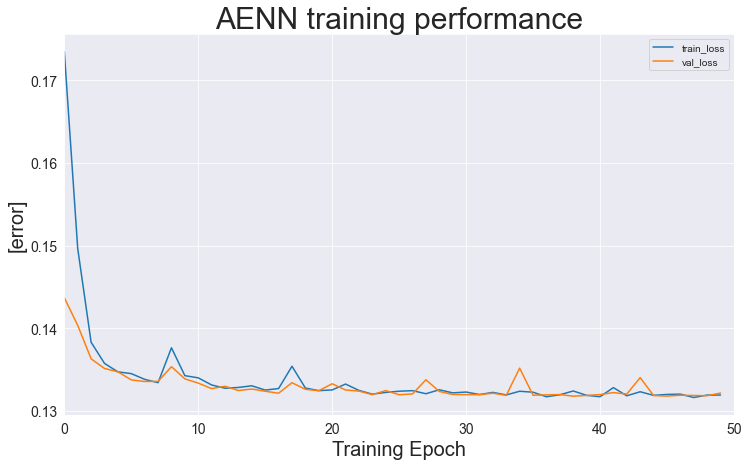

In [39]:
# plot the training progress
plt.figure(figsize=(12, 7))
plt.plot(range(0, len(epoch_losses)), epoch_losses ,label = "train_loss" )
plt.plot(range(0, len(epoch_losses)), epoch_losses_val,label = "val_loss")
plt.xlabel('Training Epoch',fontsize=20)
plt.xlim([0, len(epoch_losses)])
plt.ylabel('[error]',fontsize=20)
plt.legend()

plt.tick_params(labelsize= 14)
plt.title('AENN training performance',fontsize=30)

---

In [40]:
# convert pre-processed data to pytorch tensor
torch_test = torch.from_numpy(test_data.iloc[:,0:-1].values).float()

In [41]:
# convert encoded transactional data to torch Variable
data = autograd.Variable(torch_test)

# set networks in evaluation mode (don't apply dropout)
encoder_train.eval()
decoder_train.eval()

# reconstruct encoded transactional data
reconstruction = decoder_train(encoder_train(data))

In [42]:
test_data.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
109953,0.998749,0.0,0.746777,0.417017,0.998149,0.000303,0.004614,0.907199,0.000598,0.466651,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
84422,0.998844,0.0,0.746778,0.417017,0.998150,0.000225,0.004618,0.907174,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95594,0.998781,0.0,0.746779,0.417422,0.998151,0.000177,0.004614,0.907173,0.000599,0.459765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30409,0.998812,0.0,0.746777,0.417118,0.998150,0.000118,0.004619,0.907175,0.000599,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17860,0.998865,0.0,0.746782,0.417675,0.998155,0.000048,0.004614,0.907170,0.000599,0.487838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
reconstruction.size()[0]

22290

In [44]:
data

tensor([[0.9987, 0.0000, 0.7468,  ..., 0.0000, 1.0000, 0.0000],
        [0.9988, 0.0000, 0.7468,  ..., 0.0000, 0.0000, 0.0000],
        [0.9988, 0.0000, 0.7468,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.9985, 0.0000, 0.7468,  ..., 0.0000, 0.0000, 0.0000],
        [0.9988, 0.0000, 0.7468,  ..., 0.0000, 0.0000, 0.0000],
        [0.9987, 0.0000, 0.7468,  ..., 0.0000, 0.0000, 0.0000]])

In [45]:
# init binary cross entropy errors
reconstruction_loss_transaction = np.zeros(reconstruction.size()[0])

# iterate over all detailed reconstructions
for i in range(0, reconstruction.size()[0]):

    # determine reconstruction loss - individual transactions
    reconstruction_loss_transaction[i] = loss_function(reconstruction[i], data[i]).item()

    if(i % 5000 == 0):

        ### print conversion summary
        now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
        print('[LOG {}] collected individual reconstruction loss of: {:06}/{:06} transactions'.format(now, i, reconstruction.size()[0]))


[LOG 20210601-15:45:41] collected individual reconstruction loss of: 000000/022290 transactions
[LOG 20210601-15:45:41] collected individual reconstruction loss of: 005000/022290 transactions
[LOG 20210601-15:45:41] collected individual reconstruction loss of: 010000/022290 transactions
[LOG 20210601-15:45:41] collected individual reconstruction loss of: 015000/022290 transactions
[LOG 20210601-15:45:41] collected individual reconstruction loss of: 020000/022290 transactions


[[1.00000000e+00 1.30640894e-01 6.60000000e+01]
 [1.00000000e+00 1.31822705e-01 1.07000000e+02]
 [1.00000000e+00 1.30930156e-01 1.74000000e+02]
 [1.00000000e+00 1.35806993e-01 2.32000000e+02]
 [1.00000000e+00 1.31128401e-01 5.36000000e+02]
 [1.00000000e+00 1.30663663e-01 5.95000000e+02]
 [1.00000000e+00 1.31089330e-01 6.08000000e+02]
 [1.00000000e+00 1.30879596e-01 7.30000000e+02]
 [1.00000000e+00 1.30577832e-01 7.70000000e+02]
 [1.00000000e+00 1.30725533e-01 8.11000000e+02]
 [1.00000000e+00 1.31967634e-01 8.14000000e+02]
 [1.00000000e+00 1.30893156e-01 8.63000000e+02]
 [1.00000000e+00 1.30640179e-01 8.76000000e+02]
 [1.00000000e+00 1.31217003e-01 9.09000000e+02]
 [1.00000000e+00 1.31053597e-01 1.03500000e+03]
 [1.00000000e+00 1.31333411e-01 1.08200000e+03]
 [1.00000000e+00 1.30675167e-01 1.08500000e+03]
 [1.00000000e+00 1.31311521e-01 1.15700000e+03]
 [1.00000000e+00 1.30946785e-01 1.22200000e+03]
 [1.00000000e+00 1.32571384e-01 1.40700000e+03]
 [1.00000000e+00 1.30803823e-01 1.525000

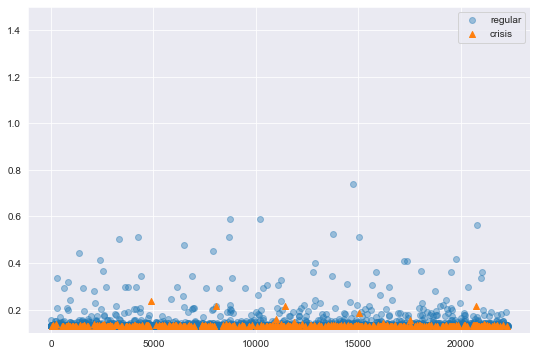

In [46]:
# test_data   prepare plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
# assign unique id to transactions

plot_data_test = np.column_stack((test_data["crisis"].values,reconstruction_loss_transaction ,np.arange(len(reconstruction_loss_transaction))))

# # obtain regular transactions as well as global and local anomalies
regular_company_test = plot_data_test[plot_data_test[:,0] == 0 ]
crisis_company_test = plot_data_test[plot_data_test[:,0] == 1 ]

# # plot reconstruction error scatter plot
ax.scatter(regular_company_test[:, 2], regular_company_test[:, 1], c='C0', alpha=0.4, marker="o", label='regular') # plot regular 
ax.scatter(crisis_company_test[:, 2], crisis_company_test[:, 1], c='C1', marker="^", label='crisis') # plot crisis

plt.ylim([0.1,1.5])

print(crisis_company_test)
# # add plot legend of transaction classes
ax.legend(loc='best')

In [47]:
pd.DataFrame(regular_company_test)

,0,1,2
0,0.0,0.130938,0.0
1,0.0,0.130826,1.0
2,0.0,0.130795,2.0
3,0.0,0.130751,3.0
4,0.0,0.130703,4.0
...,...,...,...
21952,0.0,0.130604,22285.0
21953,0.0,0.130768,22286.0
21954,0.0,0.131139,22287.0
21955,0.0,0.130918,22288.0


In [48]:
pd.DataFrame(plot_data_test)

,0,1,2
0,0.0,0.130938,0.0
1,0.0,0.130826,1.0
2,0.0,0.130795,2.0
3,0.0,0.130751,3.0
4,0.0,0.130703,4.0
...,...,...,...
22285,0.0,0.130604,22285.0
22286,0.0,0.130768,22286.0
22287,0.0,0.131139,22287.0
22288,0.0,0.130918,22288.0


In [49]:
crisis_company_test = pd.DataFrame(crisis_company_test,columns=["crisis","reconstruction_loss","id"])
crisis_company_test

,crisis,reconstruction_loss,id
0,1.0,0.130641,66.0
1,1.0,0.131823,107.0
2,1.0,0.130930,174.0
3,1.0,0.135807,232.0
4,1.0,0.131128,536.0
...,...,...,...
328,1.0,0.133771,21750.0
329,1.0,0.130719,21756.0
330,1.0,0.130766,21912.0
331,1.0,0.133557,22065.0


In [50]:
regular_company_test = pd.DataFrame(regular_company_test,columns=["crisis","reconstruction_loss","id"])
regular_company_test

,crisis,reconstruction_loss,id
0,0.0,0.130938,0.0
1,0.0,0.130826,1.0
2,0.0,0.130795,2.0
3,0.0,0.130751,3.0
4,0.0,0.130703,4.0
...,...,...,...
21952,0.0,0.130604,22285.0
21953,0.0,0.130768,22286.0
21954,0.0,0.131139,22287.0
21955,0.0,0.130918,22288.0


In [51]:
test_data_all = pd.concat([crisis_company_test,regular_company_test] ,axis =0)
test_data_all

,crisis,reconstruction_loss,id
0,1.0,0.130641,66.0
1,1.0,0.131823,107.0
2,1.0,0.130930,174.0
3,1.0,0.135807,232.0
4,1.0,0.131128,536.0
...,...,...,...
21952,0.0,0.130604,22285.0
21953,0.0,0.130768,22286.0
21954,0.0,0.131139,22287.0
21955,0.0,0.130918,22288.0


In [52]:
# testing data report

test_data_all["predict"] = (test_data_all["reconstruction_loss"] > threshold).astype(float)

from sklearn.metrics import classification_report

print(classification_report(test_data_all["crisis"],test_data_all["predict"]))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     21957
         1.0       0.06      0.17      0.08       333

    accuracy                           0.94     22290
   macro avg       0.52      0.56      0.53     22290
weighted avg       0.97      0.94      0.96     22290



---
---
### AE_train+時間的資料  -全部資料進模型跑

In [53]:
all_dataset = pd.read_csv("./AE_train+時間.csv")
all_dataset

,Current_Ratio,oper_cashflow_liab,current_liab_current_assets,working_capital_assets,Net_Sales_Assets,Receivables_Turnover_Ratio,Inventory_Turnover,Fixed_Assets_Turnover,net_worth_turnover_ratio,INV_AR_Equity,...,i71_nan,fin_depen_related_parties_nan,ratio_invest_equity_nan,ratio_invest_assets_nan,ratio_endorsement_equity_nan,adj_laib_equity_nan,ratio_director_shareholder_holding_nan,ratio_majority shareholder_nan,ratio_director_shareholder_Pledge_nan,negative_two_years_nan
0,82.01,0.05,1.22,-0.02,0.20,5.87,11.06,0.32,0.61,16.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69.77,0.01,1.43,-0.06,0.25,6.34,11.76,0.39,0.71,16.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95.36,0.13,1.05,-0.01,0.31,7.04,16.28,0.48,0.82,14.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,139.54,0.11,0.72,0.05,0.35,7.43,16.37,0.54,0.86,16.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,143.47,0.10,0.70,0.06,0.19,8.13,12.18,0.61,0.97,19.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111442,0.00,0.05,0.00,0.00,0.31,5.25,0.00,3.39,1.48,0.00,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
111443,0.00,0.00,0.00,0.00,0.06,4.73,0.00,2.76,1.22,0.00,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
111444,0.00,0.01,0.00,0.00,0.13,4.78,0.00,2.93,1.29,0.00,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
111445,0.00,0.03,0.00,0.00,0.21,4.98,0.00,3.11,1.35,0.00,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [54]:
#只抓前二十個重要特徵

all_dataset = pd.concat([all_dataset.Retained_earnings_assets,
all_dataset.negative_two_years,
all_dataset.earning_before_tax_margin,
all_dataset.Income_Before_Tax_and_Interests_assets,
all_dataset.Operating_margin,
all_dataset.Debt_Equity_Ratio,
all_dataset.Net_Asset_Value_per_Share_F,
all_dataset.ration_of_interest_expense,
all_dataset.l4,
all_dataset.i69,
all_dataset.net_income_change_rate,
all_dataset.l3,
all_dataset.l17,
all_dataset.Interest_Coverage_Ratio,
all_dataset.current_liab_current_assets,
all_dataset.debt_ratio,
all_dataset.Equity_Asset_Ratio,
all_dataset.Return_on_Operating_Assets,
all_dataset.i71,
all_dataset.fin_depen_related_parties,
all_dataset.Retained_earnings_assets_nan,
all_dataset.negative_two_years_nan,
all_dataset.earning_before_tax_margin_nan,
all_dataset.Income_Before_Tax_and_Interests_assets_nan,
all_dataset.Operating_margin_nan,
all_dataset.Debt_Equity_Ratio_nan,
all_dataset.Net_Asset_Value_per_Share_F_nan,
all_dataset.ration_of_interest_expense_nan,
all_dataset.l4_nan,
all_dataset.i69_nan,
all_dataset.net_income_change_rate_nan,
all_dataset.l3_nan,
all_dataset.l17_nan,
all_dataset.Interest_Coverage_Ratio_nan,
all_dataset.current_liab_current_assets_nan,
all_dataset.debt_ratio_nan,
all_dataset.Equity_Asset_Ratio_nan,
all_dataset.Return_on_Operating_Assets_nan,
all_dataset.i71_nan,
all_dataset.fin_depen_related_parties_nan,
all_dataset.crisis,
all_dataset.company,
all_dataset.time_q],axis =1)

In [55]:
company = all_dataset.pop('company')
time_q = all_dataset.pop('time_q')

In [56]:
company,time_q

(0          1101
 1          1101
 2          1101
 3          1101
 4          1101
           ...  
 111442    Y9999
 111443    Y9999
 111444    Y9999
 111445    Y9999
 111446    Y9999
 Name: company, Length: 111447, dtype: object,
 0         2001Q4
 1         2002Q4
 2         2003Q4
 3         2004Q4
 4         2005Q2
            ...  
 111442    2019Q4
 111443    2020Q1
 111444    2020Q2
 111445    2020Q3
 111446    2020Q4
 Name: time_q, Length: 111447, dtype: object)

In [57]:
all_dataset.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
0,0.03,0,0.81,0.02,3.06,193.85,21.30,114.12,0.07,12.18,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.04,0,-0.28,0.02,9.42,177.04,23.24,72.75,-0.14,11.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.05,0,7.09,0.04,17.67,159.64,22.99,63.70,1.23,10.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.07,0,15.48,0.07,18.04,142.68,23.42,26.97,2.94,11.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.06,0,19.08,0.04,19.13,146.26,22.83,18.31,2.05,8.18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [58]:
# 全部正規化 以train_data為標準

for col in all_dataset.columns:
    all_dataset[col] = (all_dataset[col] - train[col].min()) / (train[col].max() - train[col].min())
all_dataset = all_dataset.fillna(0)
all_dataset.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
0,0.998717,0.0,0.746777,0.417068,0.998149,0.000465,0.004617,0.907245,0.000598,0.476128,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.998728,0.0,0.746777,0.417068,0.998151,0.000425,0.004618,0.907218,0.000597,0.475218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.998738,0.0,0.746778,0.417169,0.998152,0.000383,0.004618,0.907212,0.000599,0.475156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.998759,0.0,0.746779,0.417321,0.998152,0.000342,0.004618,0.907188,0.000600,0.475825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.998749,0.0,0.746780,0.417169,0.998153,0.000351,0.004618,0.907182,0.000599,0.473016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
all_dataset = pd.concat([all_dataset,company,time_q],axis =1)

In [60]:
all_dataset  = shuffle(all_dataset)

In [61]:
all_dataset.head()

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis,company,time_q
109025,0.998802,0.0,0.746777,0.417220,0.998149,0.000416,0.004618,0.907175,0.000601,0.466651,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,M2329,2011Q3
80,0.998940,0.0,0.746776,0.416966,0.998149,0.000141,0.004622,0.907136,0.000598,0.481933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1103,2010Q1
28423,0.998961,0.0,0.746784,0.417270,0.998159,0.000119,0.004616,0.907174,0.000599,0.470137,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2617,2008Q1
25601,0.998728,0.0,0.746778,0.417068,0.998149,0.000142,0.004616,0.907177,0.000598,0.471748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2499,2007Q2
67447,0.998738,0.0,0.746776,0.416966,0.998149,0.000144,0.004613,0.907136,0.000597,0.508575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5310,2016Q1


In [62]:
company = all_dataset.pop('company')
time_q = all_dataset.pop('time_q')

# 為了想與X一起shuffle，合併 -> 擾動 -> 拆出

In [63]:
all_dataset

,Retained_earnings_assets,negative_two_years,earning_before_tax_margin,Income_Before_Tax_and_Interests_assets,Operating_margin,Debt_Equity_Ratio,Net_Asset_Value_per_Share_F,ration_of_interest_expense,l4,i69,...,l3_nan,l17_nan,Interest_Coverage_Ratio_nan,current_liab_current_assets_nan,debt_ratio_nan,Equity_Asset_Ratio_nan,Return_on_Operating_Assets_nan,i71_nan,fin_depen_related_parties_nan,crisis
109025,0.998802,0.0,0.746777,0.417220,0.998149,0.000416,0.004618,0.907175,0.000601,0.466651,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80,0.998940,0.0,0.746776,0.416966,0.998149,0.000141,0.004622,0.907136,0.000598,0.481933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28423,0.998961,0.0,0.746784,0.417270,0.998159,0.000119,0.004616,0.907174,0.000599,0.470137,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25601,0.998728,0.0,0.746778,0.417068,0.998149,0.000142,0.004616,0.907177,0.000598,0.471748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67447,0.998738,0.0,0.746776,0.416966,0.998149,0.000144,0.004613,0.907136,0.000597,0.508575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22895,0.998728,0.0,0.746776,0.416966,0.998147,0.000301,0.004613,0.907151,0.000597,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6392,0.998791,0.0,0.746778,0.417017,0.998151,0.000274,0.004613,0.907177,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102649,0.998728,1.0,0.746777,0.416966,0.998149,0.000284,0.004614,0.907236,0.000598,0.466651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101381,0.998940,0.0,0.746778,0.417321,0.998150,0.000078,0.004609,0.907173,0.000598,0.466651,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [64]:
company,time_q

(109025     M2329
 80          1103
 28423       2617
 25601       2499
 67447       5310
            ...  
 22895       2442
 6392        1524
 102649      9919
 101381    911602
 18366       2349
 Name: company, Length: 111447, dtype: object,
 109025    2011Q3
 80        2010Q1
 28423     2008Q1
 25601     2007Q2
 67447     2016Q1
            ...  
 22895     2017Q2
 6392      2019Q1
 102649    2017Q1
 101381    2010Q3
 18366     2017Q4
 Name: time_q, Length: 111447, dtype: object)

In [65]:
# convert pre-processed data to pytorch tensor
all_data_tomodel = torch.from_numpy(all_dataset.iloc[:,0:-1].values).float()

In [66]:
# convert encoded transactional data to torch Variable
all_data_ = autograd.Variable(all_data_tomodel)

# set networks in evaluation mode (don't apply dropout)
encoder_train.eval()
decoder_train.eval()

# reconstruct encoded transactional data
reconstruction_alldata = decoder_train(encoder_train(all_data_))

In [67]:
# init binary cross entropy errors
reconstruction_loss_transaction_all = np.zeros(reconstruction_alldata.size()[0])

# iterate over all detailed reconstructions
for i in range(0, reconstruction_alldata.size()[0]):

    # determine reconstruction loss - individual transactions
    reconstruction_loss_transaction_all[i] = loss_function(reconstruction_alldata[i], all_data_[i]).item()

    if(i % 10000 == 0):

        ### print conversion summary
        now = datetime.utcnow().strftime("%Y%m%d-%H:%M:%S")
        print('[LOG {}] collected individual reconstruction loss of: {:06}/{:06} transactions'.format(now, i, reconstruction_alldata.size()[0]))



[LOG 20210601-15:45:45] collected individual reconstruction loss of: 000000/111447 transactions
[LOG 20210601-15:45:46] collected individual reconstruction loss of: 010000/111447 transactions
[LOG 20210601-15:45:46] collected individual reconstruction loss of: 020000/111447 transactions
[LOG 20210601-15:45:47] collected individual reconstruction loss of: 030000/111447 transactions
[LOG 20210601-15:45:47] collected individual reconstruction loss of: 040000/111447 transactions
[LOG 20210601-15:45:48] collected individual reconstruction loss of: 050000/111447 transactions
[LOG 20210601-15:45:49] collected individual reconstruction loss of: 060000/111447 transactions
[LOG 20210601-15:45:49] collected individual reconstruction loss of: 070000/111447 transactions
[LOG 20210601-15:45:50] collected individual reconstruction loss of: 080000/111447 transactions
[LOG 20210601-15:45:50] collected individual reconstruction loss of: 090000/111447 transactions
[LOG 20210601-15:45:51] collected indivi

[[1.00000000e+00 1.30938336e-01 1.40000000e+01]
 [1.00000000e+00 1.31036192e-01 1.60000000e+01]
 [1.00000000e+00 1.32080004e-01 7.30000000e+01]
 ...
 [1.00000000e+00 1.30862266e-01 1.11371000e+05]
 [1.00000000e+00 1.30743653e-01 1.11418000e+05]
 [1.00000000e+00 1.30925864e-01 1.11444000e+05]]


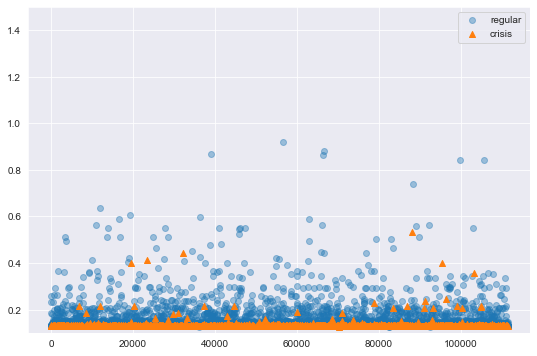

In [68]:
# prepare plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
# assign unique id to transactions

plot_alldata = np.column_stack((all_dataset["crisis"].values,reconstruction_loss_transaction_all ,np.arange(len(reconstruction_loss_transaction_all))))

# # obtain regular transactions as well as global and local anomalies
regular_company_all = plot_alldata[plot_alldata[:,0] == 0 ]
crisis_company_all = plot_alldata[plot_alldata[:,0] == 1 ]

# # plot reconstruction error scatter plot
ax.scatter(regular_company_all[:, 2], regular_company_all[:, 1], c='C0', alpha=0.4, marker="o", label='regular') # plot regular 
ax.scatter(crisis_company_all[:, 2], crisis_company_all[:, 1], c='C1', marker="^", label='crisis') # plot crisis


plt.ylim([0.1,1.5])

print(crisis_company_all)
# # add plot legend of transaction classes
ax.legend(loc='best')

In [69]:
all_dataset["crisis"]

109025    0.0
80        0.0
28423     0.0
25601     0.0
67447     0.0
         ... 
22895     0.0
6392      0.0
102649    1.0
101381    0.0
18366     0.0
Name: crisis, Length: 111447, dtype: float64

In [70]:
len(regular_company_all),len(crisis_company_all)

(109769, 1678)

In [71]:
all_dataset["crisis"]

109025    0.0
80        0.0
28423     0.0
25601     0.0
67447     0.0
         ... 
22895     0.0
6392      0.0
102649    1.0
101381    0.0
18366     0.0
Name: crisis, Length: 111447, dtype: float64

In [72]:
reconstruction_alldata

tensor([[  6.5560,  -7.7539,   1.0687,  ..., -12.8404,  21.8307,  -8.3328],
        [  6.7936, -15.4874,   1.0652,  ..., -12.5609, -17.0137, -12.5454],
        [  6.9899, -31.6576,   1.0786,  ...,  13.3626, -24.5290, -11.6213],
        ...,
        [  6.2786,  22.7528,   1.0432,  ..., -24.2377, -15.8715, -16.7745],
        [  6.6672, -12.4480,   1.1530,  ...,   0.5669,  30.9479,  -6.4374],
        [  6.1503,  11.6841,   1.0107,  ..., -27.2901, -13.3864, -13.6708]],
       grad_fn=<LeakyReluBackward1>)

In [73]:
alldataset = np.column_stack((all_dataset["crisis"].values,reconstruction_loss_transaction_all ))
alldataset

array([[0.        , 0.1309969 ],
       [0.        , 0.13081048],
       [0.        , 0.13072377],
       ...,
       [1.        , 0.13092586],
       [0.        , 0.14712696],
       [0.        , 0.13083264]])

In [74]:
alldataset = pd.DataFrame(alldataset,columns=["crisis","reconstruction_loss"])
alldataset

,crisis,reconstruction_loss
0,0.0,0.130997
1,0.0,0.130810
2,0.0,0.130724
3,0.0,0.130788
4,0.0,0.130880
...,...,...
111442,0.0,0.130908
111443,0.0,0.130883
111444,1.0,0.130926
111445,0.0,0.147127


In [75]:
all_dataset = pd.concat([company,time_q,alldataset],axis =1)

In [107]:
all_dataset["predict"] = (all_dataset["reconstruction_loss"] > threshold).astype(float)

In [108]:
print(classification_report(all_dataset["crisis"],all_dataset["predict"]))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97    109769
         1.0       0.05      0.15      0.08      1678

    accuracy                           0.95    111447
   macro avg       0.52      0.55      0.52    111447
weighted avg       0.97      0.95      0.96    111447



In [109]:
all_dataset["predict"].value_counts()

0.0    106584
1.0      4863
Name: predict, dtype: int64

In [110]:
badcompany_pred = all_dataset[all_dataset["predict"]==1]
badcompany_pred

,company,time_q,crisis,reconstruction_loss,predict
6,1101,2006Q2,0.0,0.133454,1.0
61,1101,2020Q4,0.0,0.257862,1.0
73,1103,2008Q2,1.0,0.132080,1.0
77,1103,2009Q2,0.0,0.234216,1.0
102,1103,2015Q3,0.0,0.185886,1.0
...,...,...,...,...,...
111248,Y5555,2014Q1,0.0,0.142154,1.0
111254,Y5555,2015Q3,0.0,0.144551,1.0
111336,Y8888,2004Q4,0.0,0.132167,1.0
111436,Y9999,2018Q2,0.0,0.137913,1.0


In [111]:
badcompany_pred.to_csv('AE_badcompany_pred.csv')

In [112]:
all_dataset.to_csv('AE_all_pred.csv')

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(all_dataset["crisis"], all_dataset["predict"])
print('acc_all: %.4f'%(accuracy_score*100), ' %')

from sklearn.metrics import accuracy_score
accuracy_score_ts = accuracy_score(test_data_all["crisis"],test_data_all["predict"])
print('acc_tes: %.4f'%(accuracy_score_ts*100), ' %')

acc_all: 94.5741  %
acc_tes: 94.4235  %
